In [203]:
import pandas as pd
dataset = pd.read_csv("Chapter7_Shale Gas Wells.csv")
print(dataset.describe())

       Stage Spacing      bbl/ft  Well Spacing         Dip   Thickness  \
count     506.000000  506.000000    506.000000  506.000000  506.000000   
mean      147.640316   35.134387    820.158103    0.069170  162.365613   
std        18.392128   10.533197    135.736986    0.253994   15.471044   
min       140.000000   30.000000    650.000000    0.000000  120.000000   
25%       140.000000   30.000000    700.000000    0.000000  153.000000   
50%       141.000000   30.000000    800.000000    0.000000  165.000000   
75%       148.000000   36.000000    900.000000    0.000000  176.000000   
max       330.000000   75.000000   1350.000000    1.000000  185.000000   

       Lateral Length  Injection Rate    Porosity         ISIP  \
count      506.000000      506.000000  506.000000   506.000000   
mean      8153.086957       63.079051    7.337549  7010.490119   
std        942.393981        7.250106    0.749451  1211.452205   
min       4500.000000       55.000000    5.500000  5000.000000   
25%

In [204]:
"Data Preprocessing"

x = dataset.iloc[:,0:13]
y = dataset.iloc[:,13].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
xnorm = pd.DataFrame(data = sc.fit_transform(x))
yshape = pd.DataFrame(data = y.reshape(-1, 1))
ynorm = pd.DataFrame(data = sc.fit_transform(yshape))
print(xnorm)

      0         1         2    3         4         5     6         7   \
0    0.0  0.177778  0.285714  0.0  0.692308  0.577571  0.36  0.933333   
1    0.0  0.000000  0.357143  0.0  0.830769  0.548000  0.20  0.766667   
2    0.0  0.000000  0.357143  0.0  0.830769  0.694429  0.40  0.766667   
3    0.0  0.000000  0.428571  0.0  0.846154  0.658571  0.56  0.933333   
4    0.0  0.000000  0.428571  0.0  0.846154  0.687143  0.48  0.933333   
..   ...       ...       ...  ...       ...       ...   ...       ...   
501  0.0  0.000000  0.142857  0.0  0.615385  0.581000  0.32  0.566667   
502  0.0  0.000000  0.071429  0.0  0.615385  0.490286  0.24  0.566667   
503  0.0  0.000000  0.071429  0.0  0.615385  0.654286  0.08  0.566667   
504  0.0  0.000000  0.142857  0.0  0.615385  0.619429  0.12  0.566667   
505  0.0  0.000000  0.142857  0.0  0.615385  0.473143  0.20  0.566667   

           8     9        10   11        12  
0    1.000000  0.21  0.28750  1.0  0.910476  
1    0.956562  0.10  0.55375  1

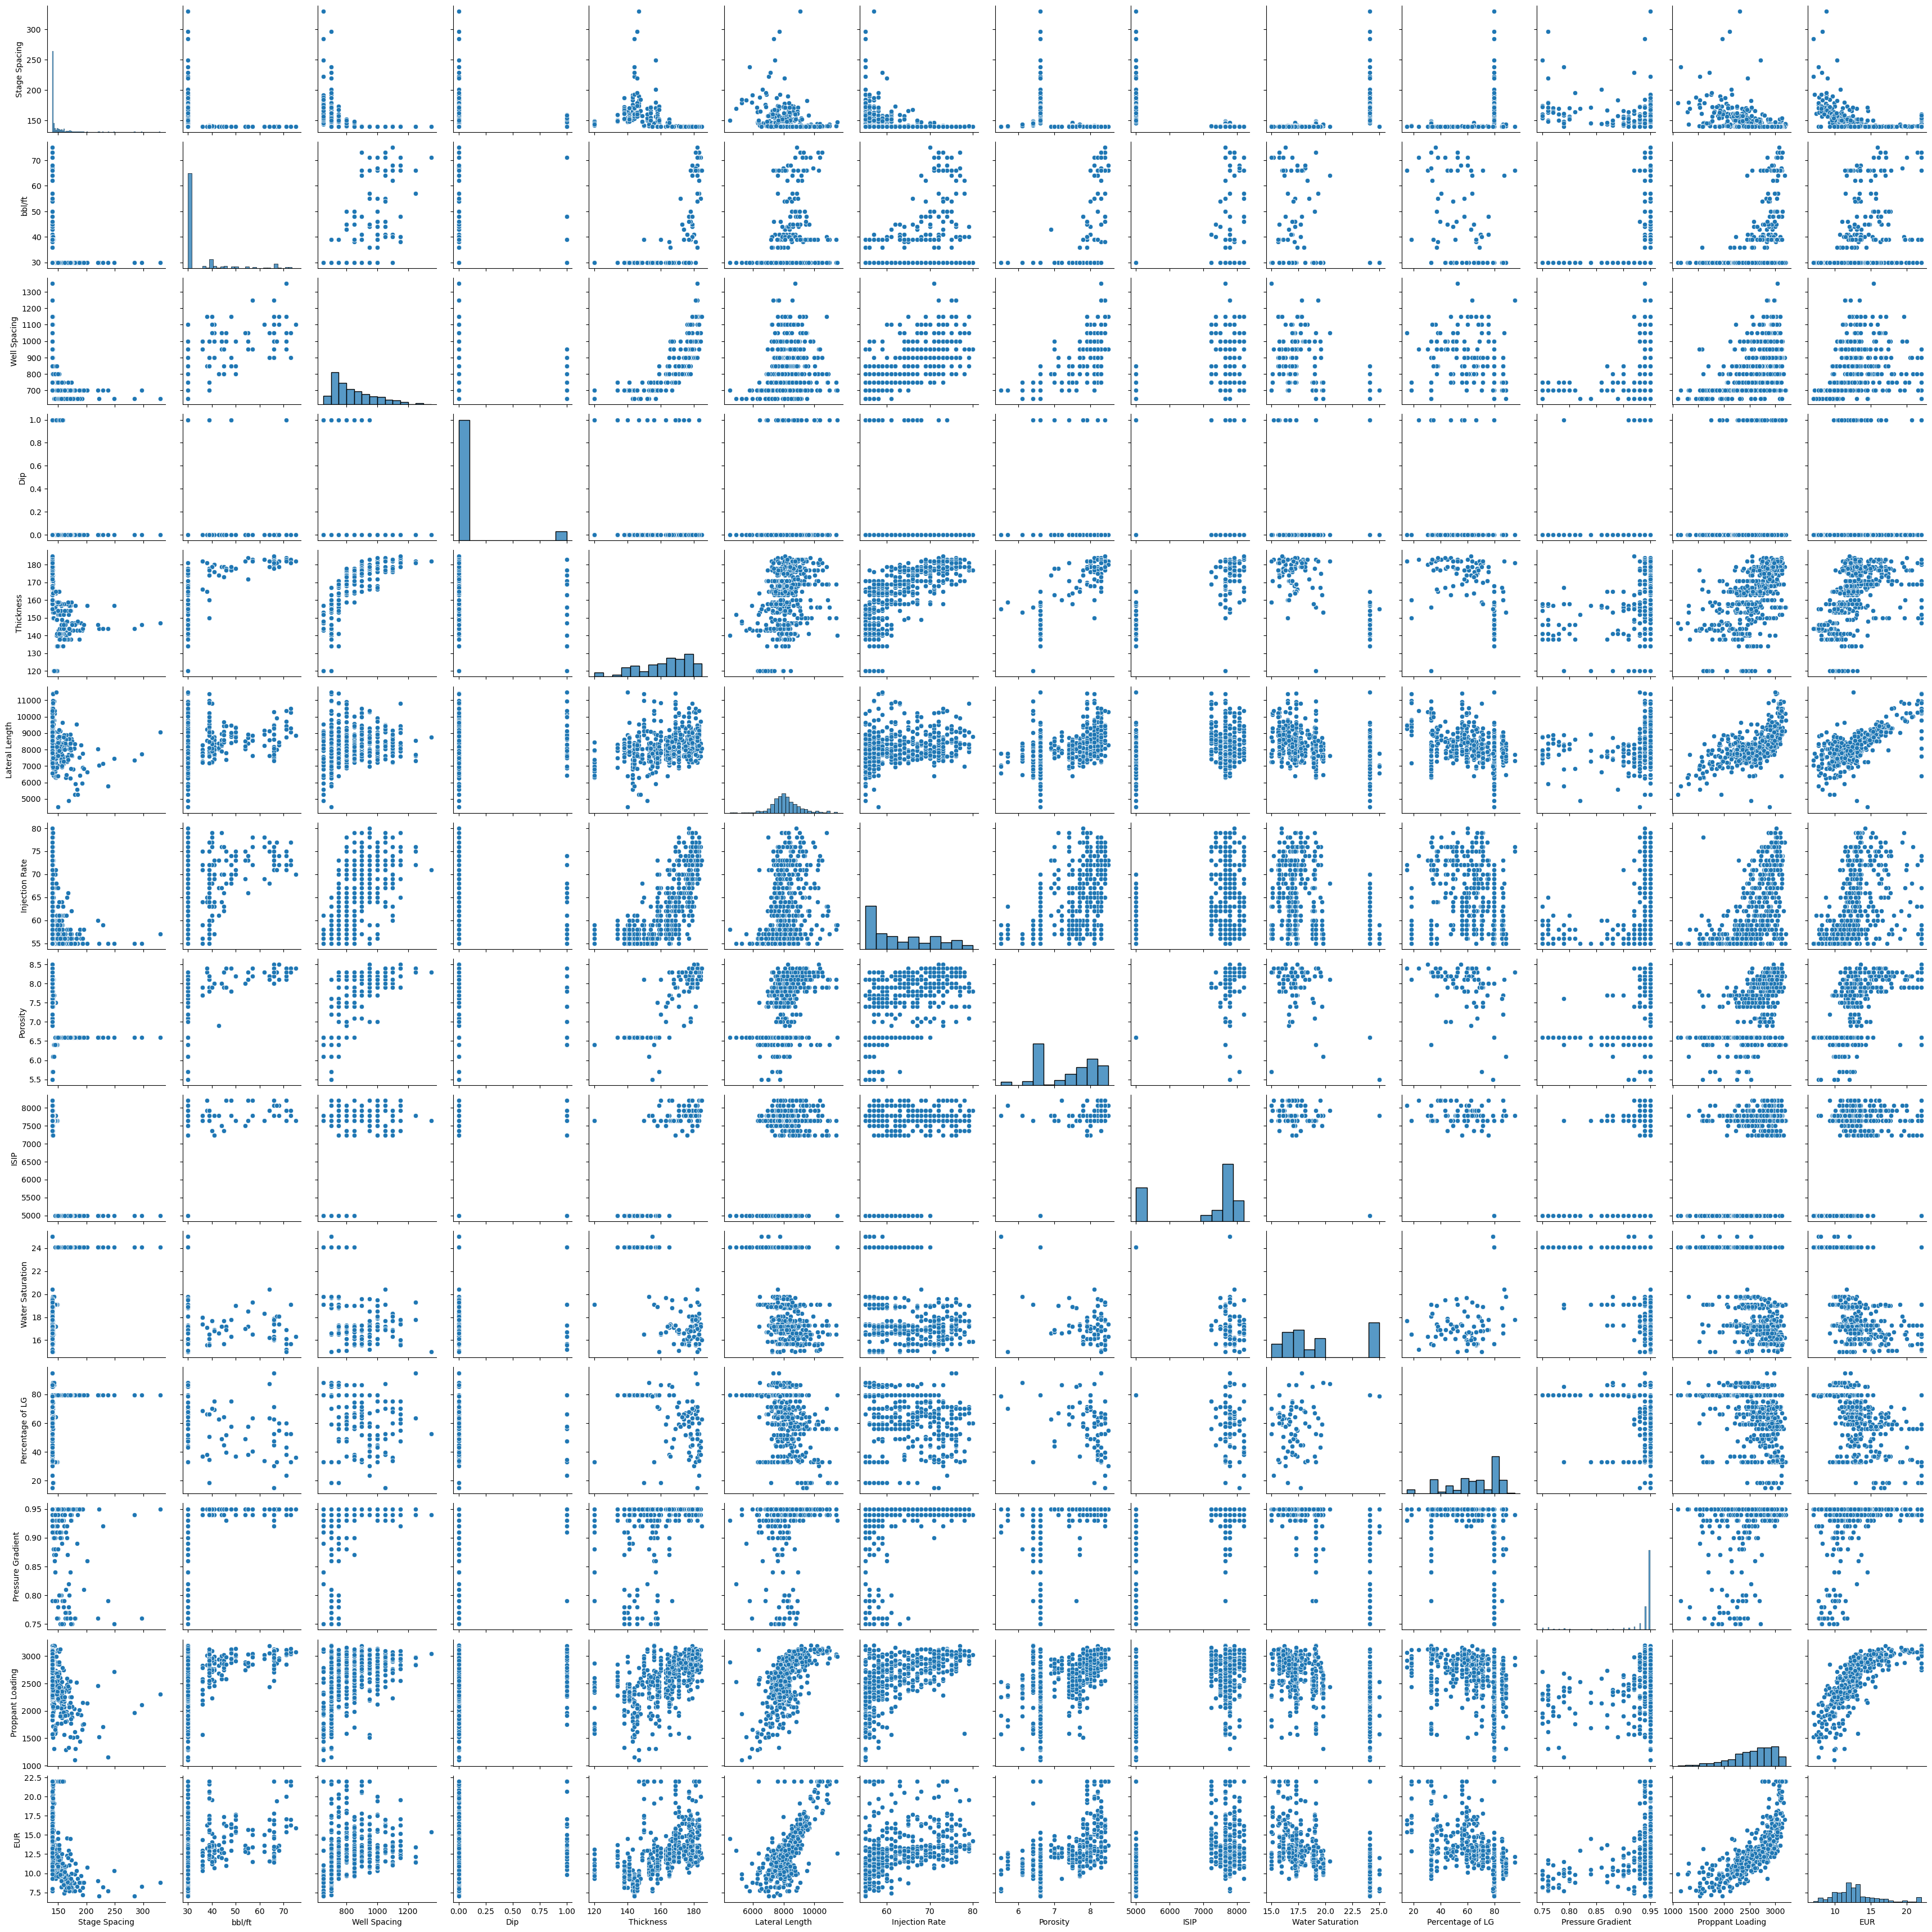

In [205]:
import seaborn as sns
sns.pairplot(dataset)

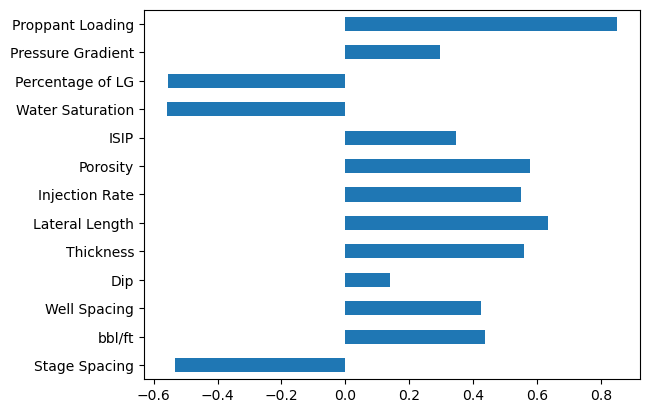

In [206]:
"Feature Ranking using 'Spearman's Rank Correlation' Techniques" # First Technique
# to calculate corr. between EUR and all the attr.; to rank the features impacting EUR

from scipy import stats
import matplotlib.pyplot as plt
datanorm = sc.fit_transform(dataset)
stats.spearmanr(dataset)
rho, pval = stats.spearmanr(datanorm)
corr = pd.Series(rho[:13, 13], index = x.columns)
corr.plot(kind = 'barh')
plt.show()

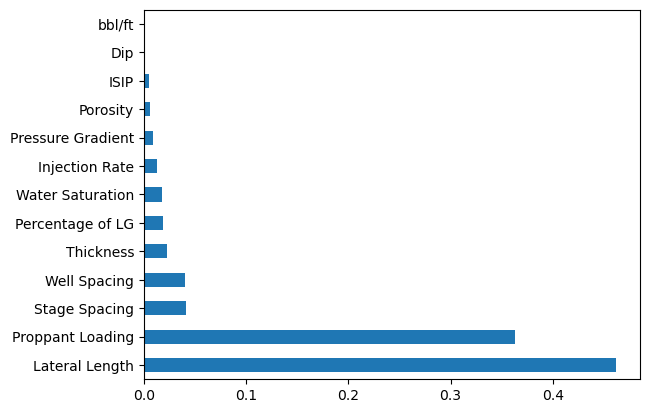

In [207]:
"Featuree Ranking using 'Random Forest' Technique" # Second Technique
# to calculate corr. between EUR and all the attr.; to rank the features impacting EUR

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth = 10, random_state = 0)
model.fit(x, y)
feat_importances = pd.Series(model.feature_importances_, index = x.columns)
feat_importances.nlargest(13).plot(kind = 'barh')
plt.show()

In [208]:
"Data Partitioning" # using (test_train_split)

import numpy as np
seed = 50
np.random.seed(seed)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xnorm, ynorm, test_size = 0.3)

In [209]:
"Constructing a Neural Network" # to regress between gas EUR and the 13 input attrs. (KIV)
"Installing libraries (keras & tensorflow) is required"
# Commands 'Sequential' and 'Dense' must be simultaneously imported

from keras.models import Sequential # to stack layers linearly
from keras.layers import Dense # to fully connected layers
from keras.callbacks import EarlyStopping

# Defining keras model
model = Sequential()
model.add(Dense(13, activation = 'relu', input_dim  = 13))
model.add(Dense(13, activation = 'relu'))
model.add(Dense(1))

np.random.seed(seed)
model.compile(optimizer = 'adam', loss = 'mean_squared_error') # to specify the optimizer, loss function, and metrics
early_stopping_monitor = EarlyStopping(patience = 3)

# Training the model
history = model.fit(x_train, y_train, epochs = 100, batch_size = 1, validation_data = (x_test, y_test), callbacks = [early_stopping_monitor])

Epoch 1/100
354/354 [==============================] - 3s 6ms/step - loss: 0.0448 - val_loss: 0.0354
Epoch 2/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0259 - val_loss: 0.0298
Epoch 3/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0206 - val_loss: 0.0245
Epoch 4/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0158 - val_loss: 0.0210
Epoch 5/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0128 - val_loss: 0.0209
Epoch 6/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0111 - val_loss: 0.0156
Epoch 7/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0109 - val_loss: 0.0153
Epoch 8/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0101 - val_loss: 0.0143
Epoch 9/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0087 - val_loss: 0.0137
Epoch 10/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0089 - val_lo

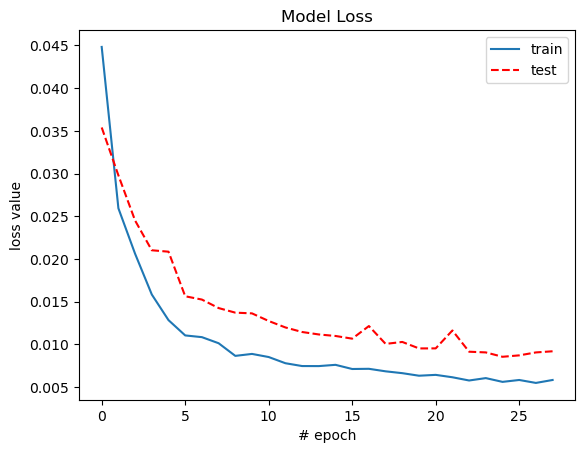

In [210]:
plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"], "r--")
plt.title('Model Loss')
plt.ylabel('loss value'); plt.xlabel('# epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()